#### Order of Operations ####

1.) Define the business question that you would like to answer with data - *As a planner/forecaster how can I leverage this data?*

2.) Define the ideal data set (ie the data set that you would collect if time and money were no object) - *A dataset that contains the media spend, media results, website data & e-comm data.*   

3.) Determine what data you can access - *TM_US_incremental_web_order_raw_data.xlsx*

4.) [Obtain the data](#obtain)

5.) [Clean the data](#scrub)

6.) [Exploratory data analysis](#explore) (understand the quirks of the particular data)

    Data Exploration:
    1. Variable Identification
    2. Univariate Analysis - explore variables one by one Central Tendency and Measure of Dispersion
    3. Bi-variate Analysis - finds out the relationship between two variables
    4. Missing values treatment
    5. Variable transformation
    6. Outlier treatment
    7. Variable creation

7.) [Statistical prediction/modeling](#model) (perform statistical prediction or modeling to answer the business question)
    - Time Series forecasting (prediction)
    - Test the accuracy of the results

8.) [Interpret results](#interpret) (so that you can tell people in plain language what the statistical models or predictions mean)

9.) Challenge results (explain to people what the potential failings of the model are so they are able to make informed decisions)

10.) Synthesize/write up results telling a story about the data that attempts to answer the question

11.) Create reproducible code

#### Import Modules ####

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline
# default notebook setup
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
pd.options.display.float_format = '{:.3f}'.format
sns.set_style("whitegrid")
sns.set_context("paper")

# Helper fun to pretty print dataframes
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

#### Obtain ####

In [2]:
# Read in the data
tm = pd.read_excel('TM_US_incremental_web_order_raw_data.xlsx', sheetname=0, index_col=None)
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
Week                      97 non-null datetime64[ns]
DisplayVisits             97 non-null int64
SEOVisits                 97 non-null int64
SEMVisits                 97 non-null int64
Bounces                   97 non-null int64
CartStarts                97 non-null int64
WebOrderSubmissions       97 non-null int64
TotalVisits               97 non-null int64
Entries                   97 non-null int64
UniqueVisitors            97 non-null int64
BounceRate                97 non-null float64
CartStartRate             97 non-null float64
WebOrderSubmissionRate    97 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 9.9 KB


In [3]:
# Display summary stats on the dataframe
tm.describe()

,DisplayVisits,SEOVisits,SEMVisits,Bounces,CartStarts,WebOrderSubmissions,TotalVisits,Entries,UniqueVisitors,BounceRate,CartStartRate,WebOrderSubmissionRate
count,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000
mean,152582.072,2992865.062,699676.309,2965001.598,157858.814,4579.320,9475107.175,9473225.866,6459644.464,0.314,0.017,0.000
std,96756.043,298546.768,158271.643,437257.161,65202.177,1369.872,891161.359,891031.491,614569.089,0.041,0.006,0.000
min,17264.000,2051718.000,232608.000,1762322.000,882.000,2816.000,7553177.000,7551175.000,5156030.000,0.198,0.000,0.000
25%,91478.000,2827534.000,650532.000,2792686.000,129854.000,3611.000,8818364.000,8816157.000,5981411.000,0.291,0.015,0.000
50%,130923.000,2938751.000,684737.000,2957670.000,150668.000,4225.000,9444971.000,9443046.000,6447975.000,0.310,0.016,0.000
75%,176592.000,3063231.000,750872.000,3199306.000,182048.000,5355.000,10077972.000,10075873.000,6895159.000,0.342,0.019,0.001
max,434751.000,4172048.000,1242658.000,3848686.000,365894.000,9634.000,12267383.000,12264531.000,8241031.000,0.406,0.031,0.001


In [4]:
# Quickly display the top 4 rows to eyeball the data
tm.head()

,Week,DisplayVisits,SEOVisits,SEMVisits,Bounces,CartStarts,WebOrderSubmissions,TotalVisits,Entries,UniqueVisitors,BounceRate,CartStartRate,WebOrderSubmissionRate
0,2015-01-04,282647,2937924,679320,2193071,946,3279,10403800,10401299,6899679,0.211,0.000,0.000
1,2015-01-11,433270,2852722,651852,2412302,902,3156,10699393,10696987,7186452,0.225,0.000,0.000
2,2015-01-18,387392,2763372,672650,2371083,882,2900,10522657,10520453,7057035,0.225,0.000,0.000
3,2015-01-25,385524,2819221,679362,2460986,14356,3091,10815097,10813593,7242211,0.228,0.001,0.000
4,2015-02-01,329124,2857191,682662,2412784,43982,3721,10496132,10493963,7157621,0.230,0.004,0.000


#### Scrub ####

In [5]:
# Change the data type and format
tm['DisplayVisits'] = tm['DisplayVisits'].astype(int)
tm['SEOVisits'] = tm['SEOVisits'].astype(int)
tm['SEMVisits'] = tm['SEMVisits'].astype(int)
tm['Bounces'] = tm['Bounces'].astype(int)
tm['CartStarts'] = tm['CartStarts'].astype(int)
tm['WebOrderSubmissions'] = tm['WebOrderSubmissions'].astype(int)
tm['TotalVisits'] = tm['TotalVisits'].astype(int)
tm['Entries'] = tm['Entries'].astype(int)
tm['UniqueVisitors'] = tm['UniqueVisitors'].astype(int)

In [6]:
tm.head()

,Week,DisplayVisits,SEOVisits,SEMVisits,Bounces,CartStarts,WebOrderSubmissions,TotalVisits,Entries,UniqueVisitors,BounceRate,CartStartRate,WebOrderSubmissionRate
0,2015-01-04,282647,2937924,679320,2193071,946,3279,10403800,10401299,6899679,0.211,0.000,0.000
1,2015-01-11,433270,2852722,651852,2412302,902,3156,10699393,10696987,7186452,0.225,0.000,0.000
2,2015-01-18,387392,2763372,672650,2371083,882,2900,10522657,10520453,7057035,0.225,0.000,0.000
3,2015-01-25,385524,2819221,679362,2460986,14356,3091,10815097,10813593,7242211,0.228,0.001,0.000
4,2015-02-01,329124,2857191,682662,2412784,43982,3721,10496132,10493963,7157621,0.230,0.004,0.000


In [7]:
# Dataset now has the correct datatypes and format
tm.info() # prints info on dataframe
tm.shape # prints dataframe shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
Week                      97 non-null datetime64[ns]
DisplayVisits             97 non-null int32
SEOVisits                 97 non-null int32
SEMVisits                 97 non-null int32
Bounces                   97 non-null int32
CartStarts                97 non-null int32
WebOrderSubmissions       97 non-null int32
TotalVisits               97 non-null int32
Entries                   97 non-null int32
UniqueVisitors            97 non-null int32
BounceRate                97 non-null float64
CartStartRate             97 non-null float64
WebOrderSubmissionRate    97 non-null float64
dtypes: datetime64[ns](1), float64(3), int32(9)
memory usage: 6.5 KB


(97, 13)

#### Explore ####

\# 1. Variable Identification

 *Type of Variable*      | *Data Type*            | *Variable Category*
  ---------------------- | ---------------------- | -------------
  **Predictor(input):**  | **String:**            | **Categorical:**
  Week                   | **Date:**              | **Ordinal:**  
  **Target(output):**    | Week                   | **Interval:**
  DisplayVisits          | **Integer/Float:**     | Week  
  SEOVisits              | DisplayVisits          | DisplayVisits  
  SEMVisits              | SEOVisits              | SEOVisits  
  Bounces                | SEMVisits              | SEMVisits  
  CartStarts             | Bounces                | Bounces  
  WebOrderSubmissions    | CartStarts             | CartStarts  
  TotalVisits            | WebOrderSubmissions    | WebOrderSubmissions  
  Entries                | TotalVisits            | TotalVisits  
  UniqueVisitors         | Entries                | Entries  
  BounceRate             | UniqueVisitors         | UniqueVisitors  
  CartStartRate          | BounceRate             | **Ratio:**  
  WebOrderSubmissionRate | CartStartRate          | CartStartRate  
                         | WebOrderSubmissionRate | WebOrderSubmissionRate 
                         |                        | BounceRate

In [8]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
Week                      97 non-null datetime64[ns]
DisplayVisits             97 non-null int32
SEOVisits                 97 non-null int32
SEMVisits                 97 non-null int32
Bounces                   97 non-null int32
CartStarts                97 non-null int32
WebOrderSubmissions       97 non-null int32
TotalVisits               97 non-null int32
Entries                   97 non-null int32
UniqueVisitors            97 non-null int32
BounceRate                97 non-null float64
CartStartRate             97 non-null float64
WebOrderSubmissionRate    97 non-null float64
dtypes: datetime64[ns](1), float64(3), int32(9)
memory usage: 6.5 KB


Stats on DisplayVisits:

count       97.000
mean    152582.072
std      96756.043
min      17264.000
25%      91478.000
50%     130923.000
75%     176592.000
max     434751.000
Name: DisplayVisits, dtype: float64

median--> 130923.000
mode--> Series([], dtype: int32)
variance--> 9361731889.818
UCL--> 346094.159
LCL--> -40930.014
skewness--> 1.275
kurtosis--> 1.232



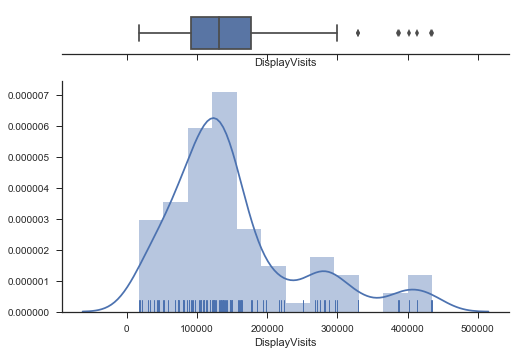

In [9]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='DisplayVisits' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on SEOVisits:

count        97.000
mean    2992865.062
std      298546.768
min     2051718.000
25%     2827534.000
50%     2938751.000
75%     3063231.000
max     4172048.000
Name: SEOVisits, dtype: float64

median--> 2938751.000
mode--> Series([], dtype: int32)
variance--> 89130172567.684
UCL--> 3589958.597
LCL--> 2395771.526
skewness--> 1.371
kurtosis--> 4.741



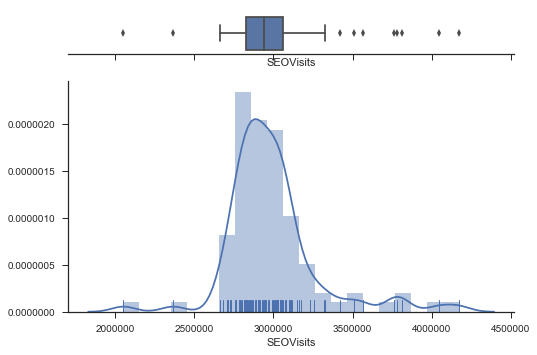

In [10]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='SEOVisits' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on SEMVisits:

count        97.000
mean     699676.309
std      158271.643
min      232608.000
25%      650532.000
50%      684737.000
75%      750872.000
max     1242658.000
Name: SEMVisits, dtype: float64

median--> 684737.000
mode--> Series([], dtype: int32)
variance--> 25049913028.362
UCL--> 1016219.596
LCL--> 383133.023
skewness--> -0.016
kurtosis--> 3.257



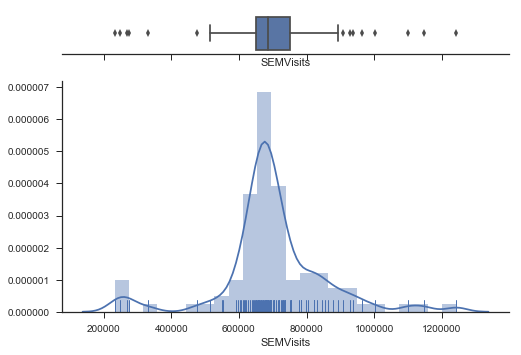

In [11]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='SEMVisits' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on Bounces:

count        97.000
mean    2965001.598
std      437257.161
min     1762322.000
25%     2792686.000
50%     2957670.000
75%     3199306.000
max     3848686.000
Name: Bounces, dtype: float64

median--> 2957670.000
mode--> Series([], dtype: int32)
variance--> 191193824577.743
UCL--> 3839515.919
LCL--> 2090487.277
skewness--> -0.153
kurtosis--> 0.196



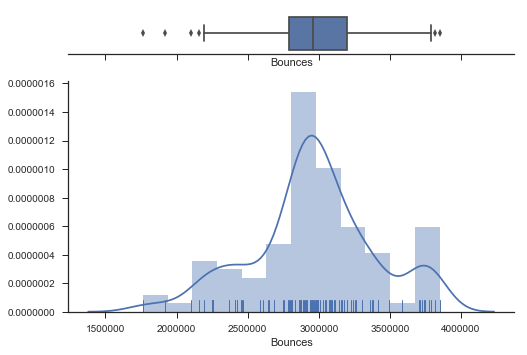

In [12]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='Bounces' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on CartStarts:

count       97.000
mean    157858.814
std      65202.177
min        882.000
25%     129854.000
50%     150668.000
75%     182048.000
max     365894.000
Name: CartStarts, dtype: float64

median--> 150668.000
mode--> Series([], dtype: int32)
variance--> 4251323829.861
UCL--> 288263.168
LCL--> 27454.461
skewness--> 0.114
kurtosis--> 1.466



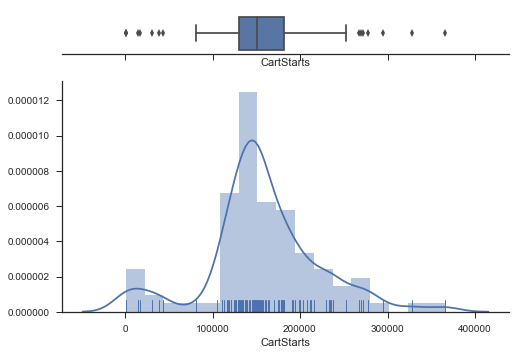

In [13]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='CartStarts' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on WebOrderSubmissions:

count     97.000
mean    4579.320
std     1369.872
min     2816.000
25%     3611.000
50%     4225.000
75%     5355.000
max     9634.000
Name: WebOrderSubmissions, dtype: float64

median--> 4225.000
mode--> 0    3437
1    3678
2    3682
3    3721
dtype: int32
variance--> 1876548.053
UCL--> 7319.063
LCL--> 1839.576
skewness--> 1.158
kurtosis--> 1.302



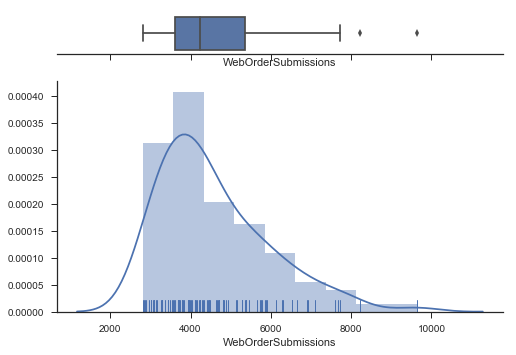

In [14]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='WebOrderSubmissions' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on TotalVisits:

count         97.000
mean     9475107.175
std       891161.359
min      7553177.000
25%      8818364.000
50%      9444971.000
75%     10077972.000
max     12267383.000
Name: TotalVisits, dtype: float64

median--> 9444971.000
mode--> Series([], dtype: int32)
variance--> 794168568009.729
UCL--> 11257429.894
LCL--> 7692784.457
skewness--> 0.472
kurtosis--> 0.322



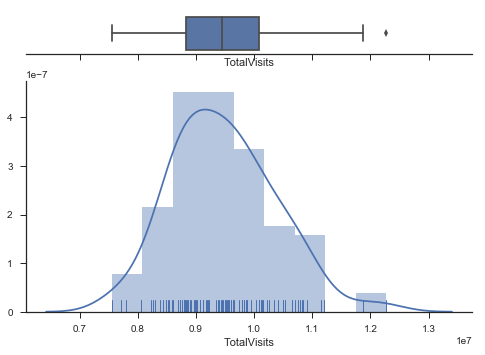

In [15]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='TotalVisits' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on Entries:

count         97.000
mean     9473225.866
std       891031.491
min      7551175.000
25%      8816157.000
50%      9443046.000
75%     10075873.000
max     12264531.000
Name: Entries, dtype: float64

median--> 9443046.000
mode--> Series([], dtype: int32)
variance--> 793937118028.597
UCL--> 11255288.848
LCL--> 7691162.884
skewness--> 0.472
kurtosis--> 0.321



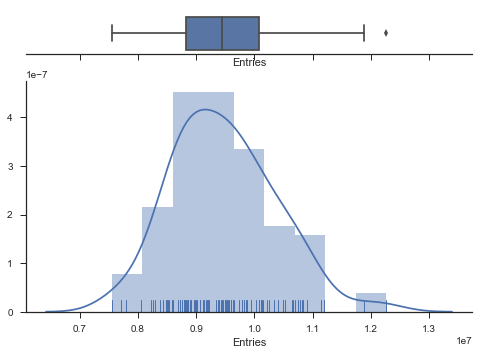

In [16]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='Entries' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on UniqueVisitors:

count        97.000
mean    6459644.464
std      614569.089
min     5156030.000
25%     5981411.000
50%     6447975.000
75%     6895159.000
max     8241031.000
Name: UniqueVisitors, dtype: float64

median--> 6447975.000
mode--> Series([], dtype: int32)
variance--> 377695164735.939
UCL--> 7688782.641
LCL--> 5230506.287
skewness--> 0.221
kurtosis--> -0.051



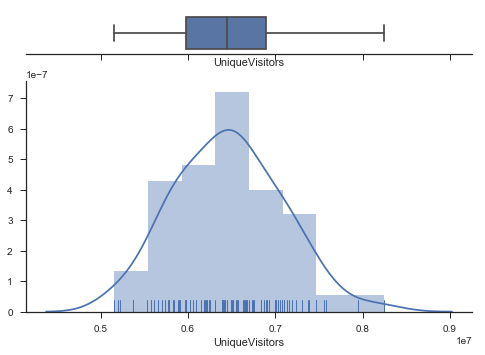

In [17]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='UniqueVisitors' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on BounceRate:

count   97.000
mean     0.314
std      0.041
min      0.198
25%      0.291
50%      0.310
75%      0.342
max      0.406
Name: BounceRate, dtype: float64

median--> 0.310
mode--> Series([], dtype: float64)
variance--> 0.002
UCL--> 0.395
LCL--> 0.232
skewness--> -0.415
kurtosis--> 0.605



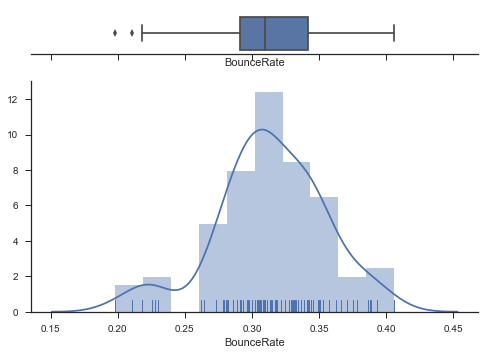

In [18]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='BounceRate' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on CartStartRate:

count   97.000
mean     0.017
std      0.006
min      0.000
25%      0.015
50%      0.016
75%      0.019
max      0.031
Name: CartStartRate, dtype: float64

median--> 0.016
mode--> Series([], dtype: float64)
variance--> 0.000
UCL--> 0.029
LCL--> 0.004
skewness--> -0.429
kurtosis--> 1.250



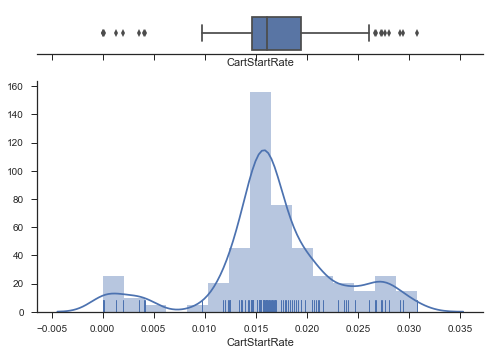

In [19]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='CartStartRate' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Stats on WebOrderSubmissionRate:

count   97.000
mean     0.000
std      0.000
min      0.000
25%      0.000
50%      0.000
75%      0.001
max      0.001
Name: WebOrderSubmissionRate, dtype: float64

median--> 0.000
mode--> Series([], dtype: float64)
variance--> 0.000
UCL--> 0.001
LCL--> 0.000
skewness--> 0.969
kurtosis--> 0.599



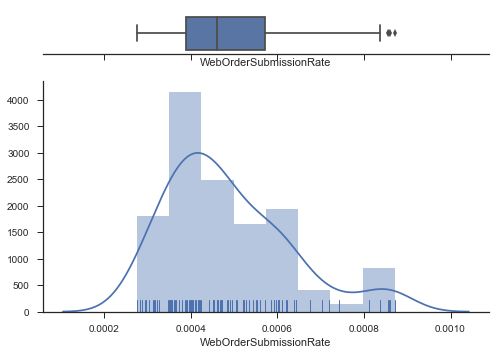

In [20]:
# 2. Univariate Analysis - explore Central Tendency, Measure of Dispersion
c ='WebOrderSubmissionRate' # Variable to analyze
df = tm    # Dataframe variable is in
# Stat print out
print('Stats on {}:\n'.format(c))
print (df[c].describe())
men = df[c].mean()
mod = df[c].mode()
med = df[c].median(axis = 0)
var = df[c].var()
ske = df[c].skew()
kur = df[c].kurt()
std = df[c].std()
ucl = men + (std*2) # about 95 percent of the data values are within two standard deviations
lcl = men - (std*2) # about 95 percent of the data values are within two standard deviations
print('\nmedian--> {0:.3f}'.format(med))
print('mode--> {}'.format(mod))
print('variance--> {0:.3f}'.format(var))
print('UCL--> {0:.3f}'.format(ucl))
print('LCL--> {0:.3f}'.format(lcl))
print('skewness--> {0:.3f}'.format(ske))
print('kurtosis--> {0:.3f}\n'.format(kur))
# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box)
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

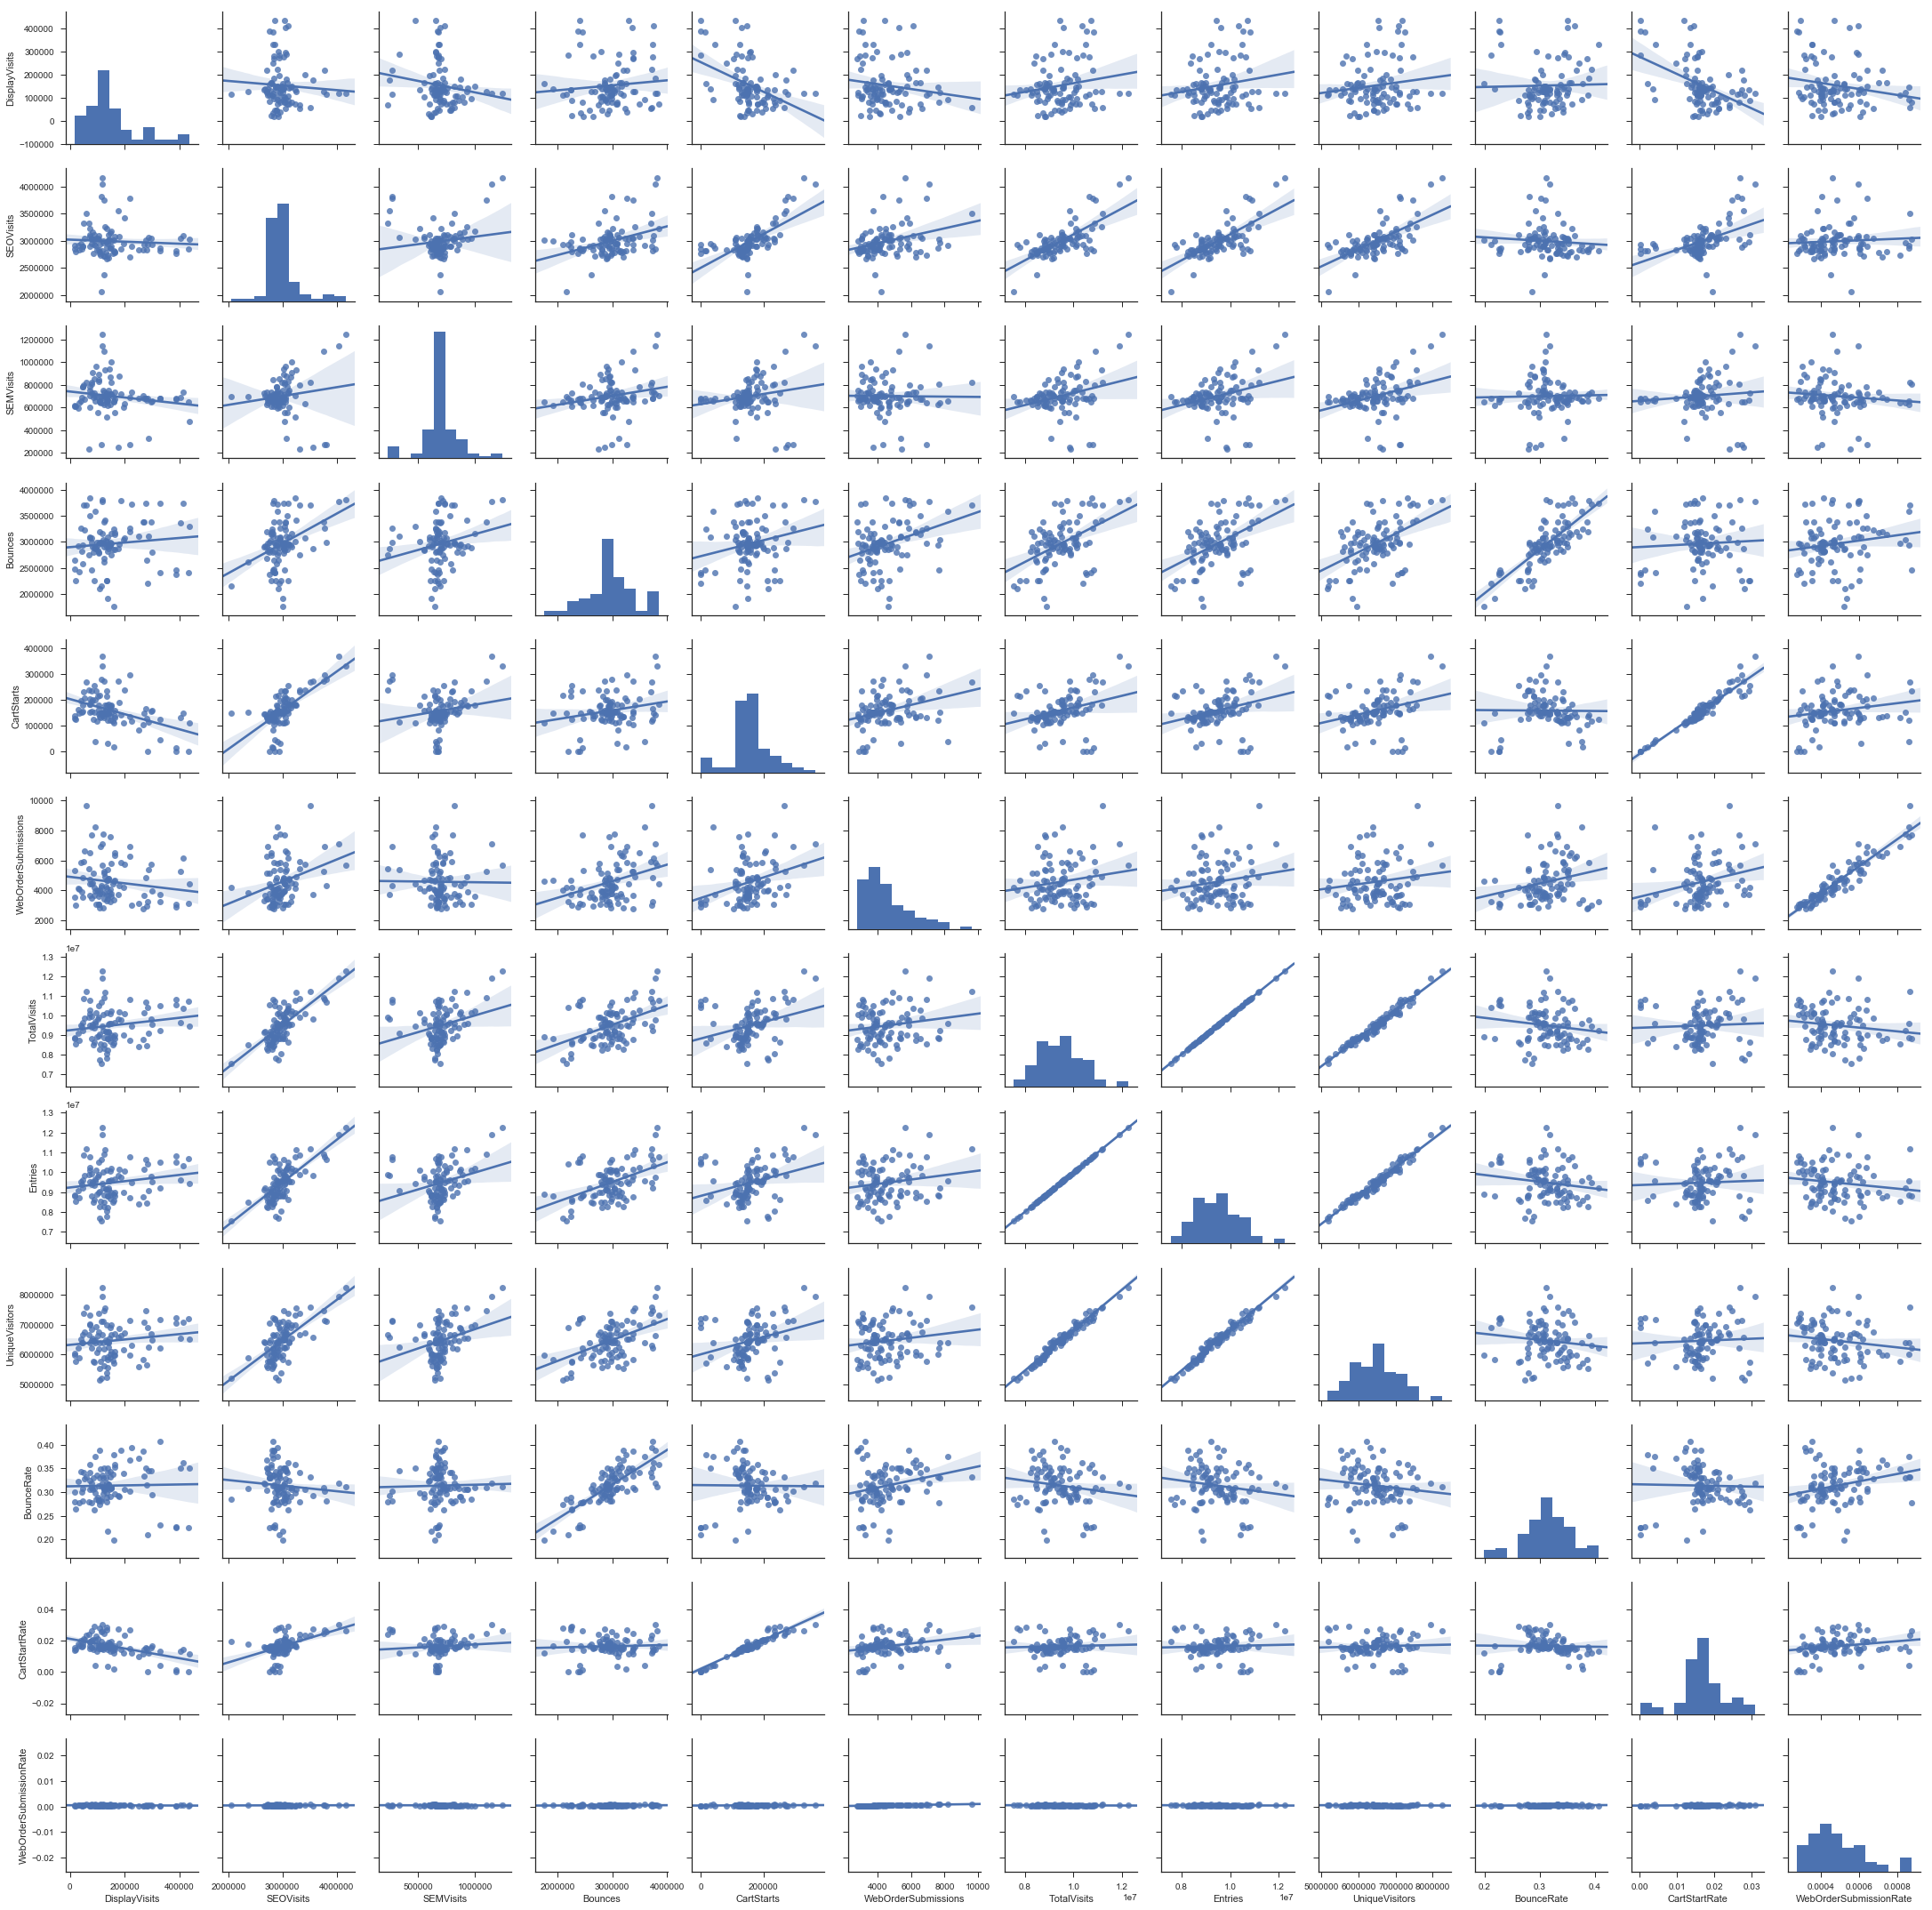

In [21]:
# 3. Bi-variate Analysis - finds out the relationship between two variables
sns.pairplot(tm, kind='reg', vars=[
    'DisplayVisits',
    'SEOVisits',
    'SEMVisits',
    'Bounces',
    'CartStarts',
    'WebOrderSubmissions',
    'TotalVisits',
    'Entries',
    'UniqueVisitors',
    'BounceRate',
    'CartStartRate',
    'WebOrderSubmissionRate'
]);

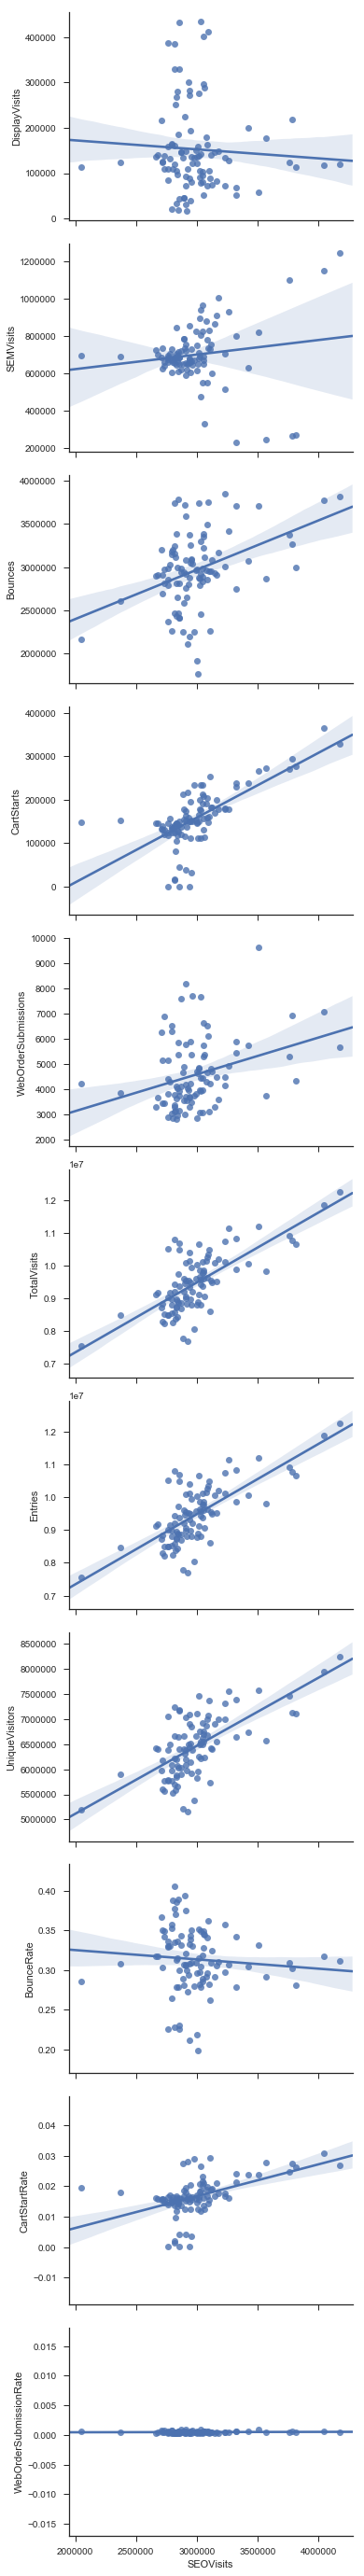

In [22]:
# 3. Bi-variate Analysis - finds out the relationship between two variables (ratios only ie. no intervals)
sns.pairplot(tm, size=3.5, aspect=1.5, kind='reg', 
             x_vars=['SEOVisits'], 
             y_vars=['DisplayVisits',
#                      'SEOVisits',
                     'SEMVisits',
                     'Bounces',
                     'CartStarts',
                     'WebOrderSubmissions',
                     'TotalVisits',
                     'Entries',
                     'UniqueVisitors',
                     'BounceRate',
                     'CartStartRate',
                     'WebOrderSubmissionRate'
                    ]);

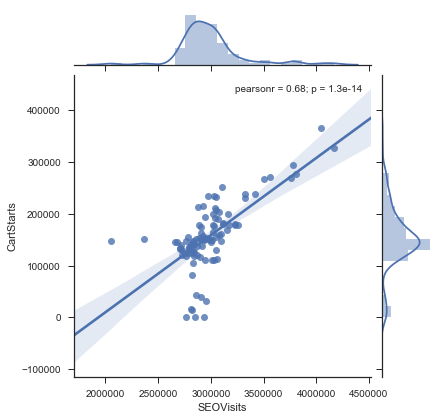

In [23]:
# 3. Bi-variate Analysis - finds out the relationship between two variables
sns.jointplot("SEOVisits", "CartStarts", data=tm, kind="reg");

In [24]:
# Correlation coefficients(strength) between attributes
%timeit tm.corr(method='pearson')
cor = tm.corr(method='pearson')
cor

1000 loops, best of 3: 356 µs per loop


,DisplayVisits,SEOVisits,SEMVisits,Bounces,CartStarts,WebOrderSubmissions,TotalVisits,Entries,UniqueVisitors,BounceRate,CartStartRate,WebOrderSubmissionRate
DisplayVisits,1.000,-0.061,-0.162,0.098,-0.433,-0.152,0.173,0.173,0.142,0.023,-0.483,-0.194
SEOVisits,-0.061,1.000,0.147,0.391,0.683,0.319,0.718,0.718,0.659,-0.086,0.498,0.069
SEMVisits,-0.162,0.147,1.000,0.220,0.184,-0.011,0.302,0.302,0.332,0.024,0.099,-0.111
Bounces,0.098,0.391,0.220,1.000,0.229,0.352,0.489,0.489,0.500,0.782,0.056,0.169
CartStarts,-0.433,0.683,0.184,0.229,1.000,0.325,0.310,0.310,0.307,-0.010,0.959,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...
Entries,0.173,0.718,0.302,0.489,0.310,0.172,1.000,1.000,0.984,-0.156,0.049,-0.155
UniqueVisitors,0.142,0.659,0.332,0.500,0.307,0.154,0.984,0.984,1.000,-0.134,0.052,-0.166
BounceRate,0.023,-0.086,0.024,0.782,-0.010,0.251,-0.156,-0.156,-0.134,1.000,-0.024,0.277
CartStartRate,-0.483,0.498,0.099,0.056,0.959,0.272,0.049,0.049,0.052,-0.024,1.000,0.235


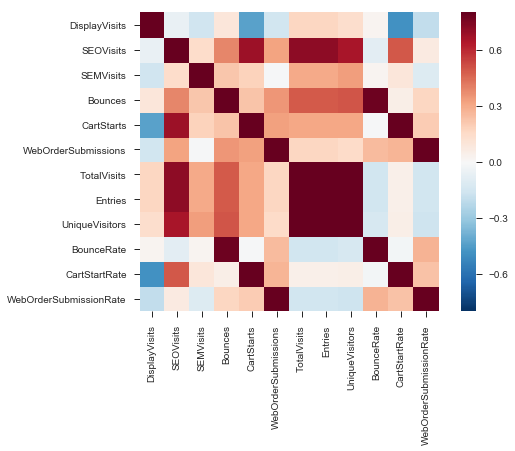

In [25]:
sns.heatmap(cor, vmax=.8, square=True );

In [26]:
# Let's show the predicitvity of the attributes to 'WebOrderSubmissionRate'
pred_WOSR = tm[['DisplayVisits',
         'SEMVisits',
         'Bounces',
         'CartStarts', 
         'WebOrderSubmissions',
         'TotalVisits',
         'Entries',
         'UniqueVisitors',
         'BounceRate',
         'CartStartRate',
         'SEOVisits',
         'WebOrderSubmissionRate']]
pearson = pred_WOSR.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort_values(ascending=False)
corr_with_target[abs(corr_with_target).argsort()[::-1]]
print(predictivity)

WebOrderSubmissions    0.943
BounceRate             0.277
CartStartRate          0.235
CartStarts             0.201
Bounces                0.169
                       ...  
SEMVisits             -0.111
TotalVisits           -0.155
Entries               -0.155
UniqueVisitors        -0.166
DisplayVisits         -0.194
Name: WebOrderSubmissionRate, dtype: float64


In [27]:
# Important correlations between input attributes and the target of 'WebOrderSubmissionRate'

attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print(unique_important_corrs)

                  attribute pair  correlation
1         (Entries, TotalVisits)        1.000
4      (Entries, UniqueVisitors)        0.984
6  (TotalVisits, UniqueVisitors)        0.984
0    (CartStartRate, CartStarts)        0.959
2          (BounceRate, Bounces)        0.782
8       (SEOVisits, TotalVisits)        0.718
5           (Entries, SEOVisits)        0.718
7        (CartStarts, SEOVisits)        0.683
9    (SEOVisits, UniqueVisitors)        0.659
3      (Bounces, UniqueVisitors)        0.500


In [28]:
# 4. Missing values treatment (deletion, imputation, prediction, KNN)

# Run function to find missing values in columns and rows
def num_missing(x):
    return sum(x.isnull())

# Applying per column:
print("Missing values per column:")
print(tm.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

# Applying per row:
print("\nMissing values per row:")
print(tm.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Week                      0
DisplayVisits             0
SEOVisits                 0
SEMVisits                 0
Bounces                   0
                         ..
Entries                   0
UniqueVisitors            0
BounceRate                0
CartStartRate             0
WebOrderSubmissionRate    0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [116]:
# And for the modeling let's forecast TotalVisits as well so let's create a dataframe with just TotalVisits
visits_df = tm[['Week', 'TotalVisits']].copy()
visits_df.head()

,Week,TotalVisits
0,2015-01-04,10403800
1,2015-01-11,10699393
2,2015-01-18,10522657
3,2015-01-25,10815097
4,2015-02-01,10496132


In [117]:
# Check the datatype to makes sure that they are usable
visits_df.dtypes

Week           datetime64[ns]
TotalVisits             int32
dtype: object

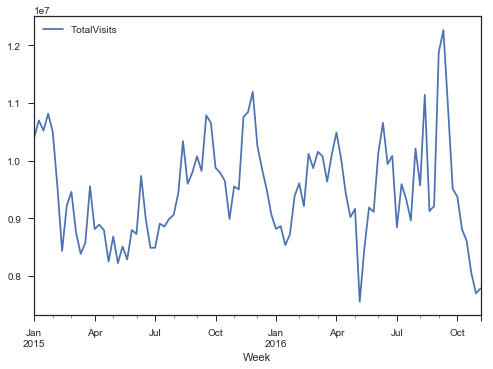

In [118]:
# Let's model TotalVisits but first lets plot and check
visits_df.set_index('Week').plot();

In [119]:
# For the modeling let's forecast WebOrderSubmissions so let's create a dataframe with just WebOrderSubmissions
orders_df = tm[['Week', 'WebOrderSubmissions']].copy()
orders_df.head()

,Week,WebOrderSubmissions
0,2015-01-04,3279
1,2015-01-11,3156
2,2015-01-18,2900
3,2015-01-25,3091
4,2015-02-01,3721


In [120]:
# Check the datatype to makes sure that they are usable
orders_df.dtypes

Week                   datetime64[ns]
WebOrderSubmissions             int32
dtype: object

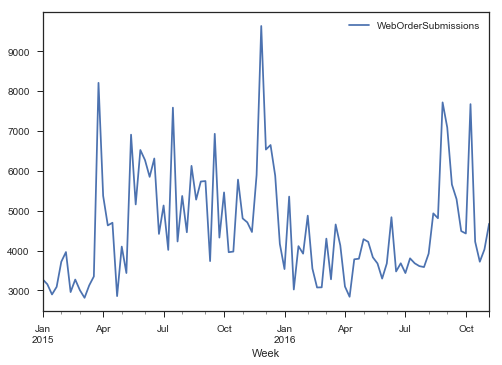

In [121]:
# Plot and check the WebOrderSubmissions
orders_df.set_index('Week').plot();

#### Transform ####

In [122]:
orders_df.head()

,Week,WebOrderSubmissions
0,2015-01-04,3279
1,2015-01-11,3156
2,2015-01-18,2900
3,2015-01-25,3091
4,2015-02-01,3721


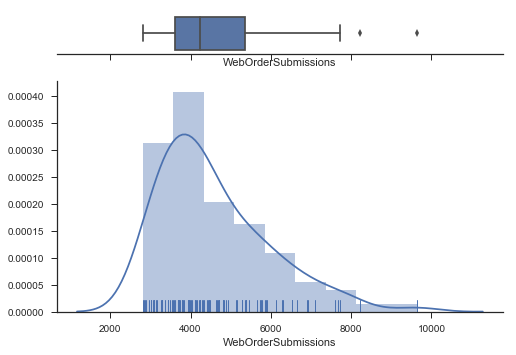

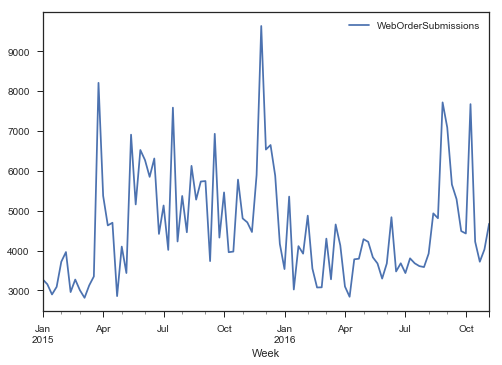

In [123]:
c ='WebOrderSubmissions'    # Variable to analyze
df = orders_df    # From this dataframe

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

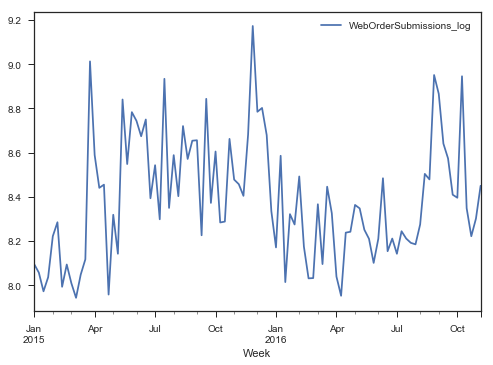

In [124]:
# 5. Variable transformation (logarithm, square/cube)
# Logging converts multiplicative relationships to additive relationships, and by the same token it converts exponential (compound growth) trends to linear trends)

c ='WebOrderSubmissions'    # Variable to analyze
df = orders_df    # From this dataframe

# Remove any zeros (otherwise we get (-inf)
df.loc[df[c] == 0, c] = np.nan

# Drop NA
df.dropna(subset=[c], inplace=True) 

# Transform the WebOrderSubmissions to a log value
df[c+'_log'] = np.log(df[c])
df.set_index('Week').plot(y=c+'_log');

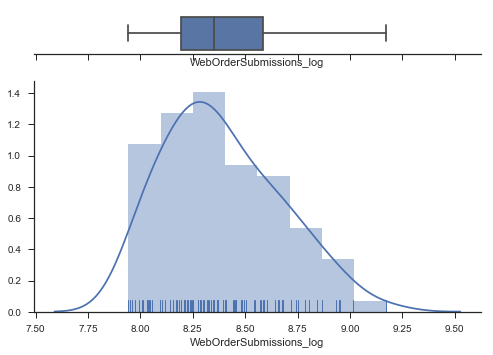

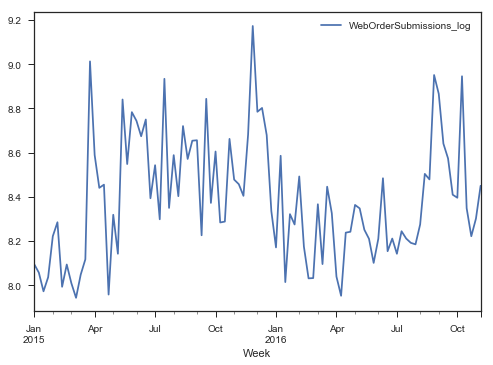

In [127]:
# 6. Outlier treatment (univariate/multivariate w/ deletion, transformation, imputation, or treat separately)
# Prophet recommends addressing outliers in by changing them to NaNs

c ='WebOrderSubmissions_log'    # Variable to analyze
df = orders_df    # From this dataframe

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [128]:
# Calculate the min and max cuttoffs for detecting the outliers 
q75, q25 = np.percentile(df[c].dropna(), [75, 25])
iqr = q75 - q25
min = q25 - (iqr*1.5)    # Lower fence
max = q75 + (iqr*1.5)    # Upper fence

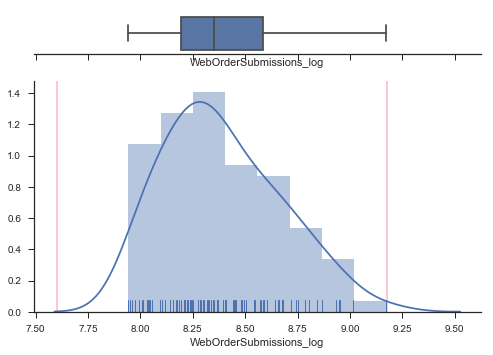

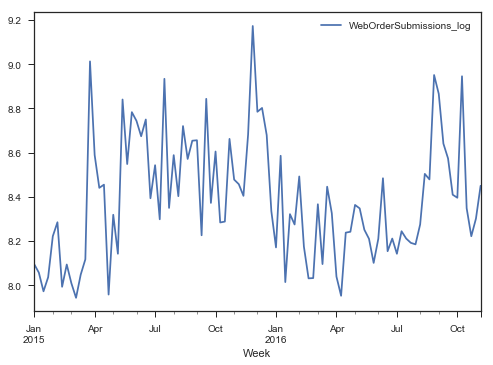

In [130]:
# Graph the outlier cutoffs

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.axvline(x=min, color='pink')    # Visualize the outlier cutoffs
plt.axvline(x=max, color='pink')    # Visualize the outlier cutoffs
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [131]:
# Identify the outliers by creating a column and flagging those data points that are < min and > max 
df['Outlier'] = 0
df.loc[df[c] < min, 'Outlier'] = 1
df.loc[df[c] > max, 'Outlier'] = 1

In [132]:
# Create a mask of `Outlier` == 0 to get rid of Outliers
df = df[(df['Outlier'] == 0)]

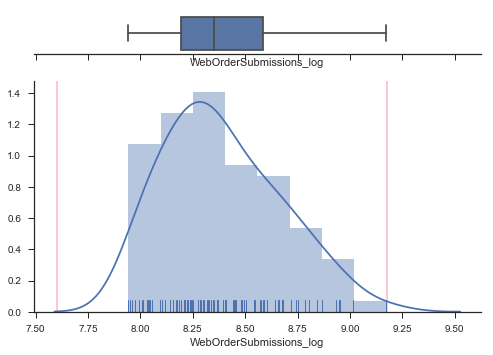

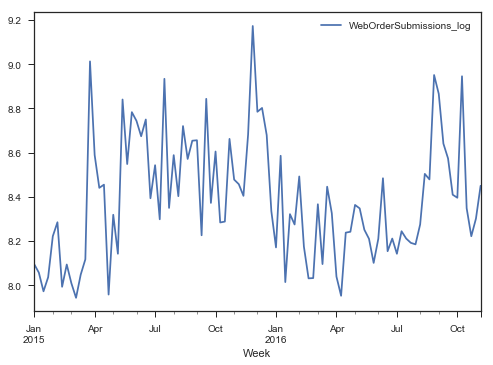

In [133]:
# Re-plot the data with the outliers removed

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.axvline(x=min, color='pink')    # Visualize the outlier cutoffs
plt.axvline(x=max, color='pink')    # Visualize the outlier cutoffs
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [135]:
# Update orders_df with df
orders_df.update(df)
orders_df = orders_df.drop('Outlier', axis=1) # drop the outlier column

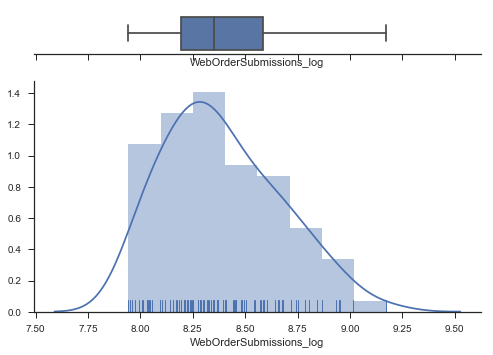

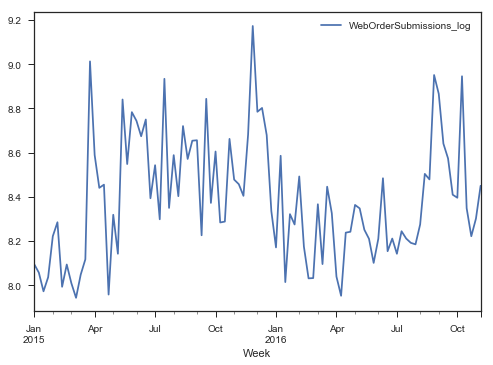

In [136]:
# Plot the orders_df df to confirm the outliers are gone and df updated
c ='WebOrderSubmissions_log'    # Variable to analyze
df = orders_df    # From this dataframe

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

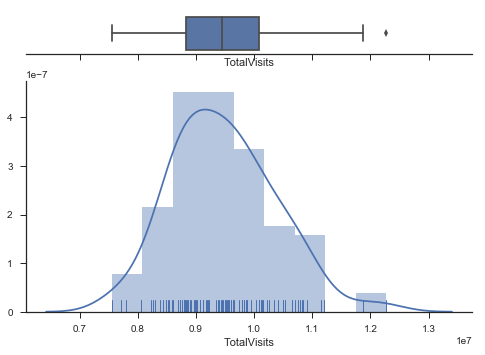

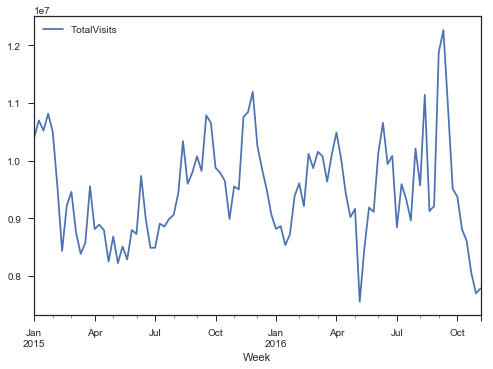

In [137]:
# Now for TotalVisits, this is a look at the data before transformation
c ='TotalVisits'    # Variable to analyze
df = visits_df    # From this dataframe

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(); # trend

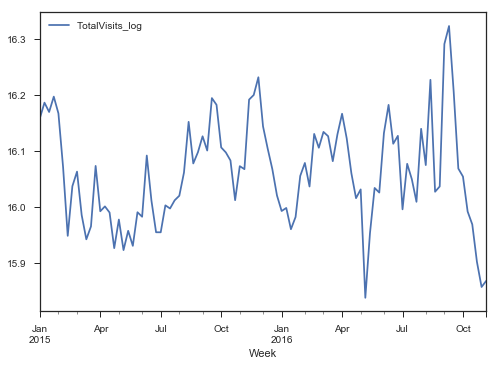

In [139]:
# 5. Variable transformation (logarithm, square/cube)
# Logging converts multiplicative relationships to additive relationships, and by the same token it converts exponential (compound growth) trends to linear trends)

c ='TotalVisits'    # Variable to analyze
df = visits_df    # From this dataframe

# Remove any zeros (otherwise we get (-inf)
df.loc[df[c] == 0, c] = np.nan

# Drop NA
df.dropna(subset=[c], inplace=True) 

# Transform the variable to a log value
df[c+'_log'] = np.log(df[c])
df.set_index('Week').plot(y=c+'_log');

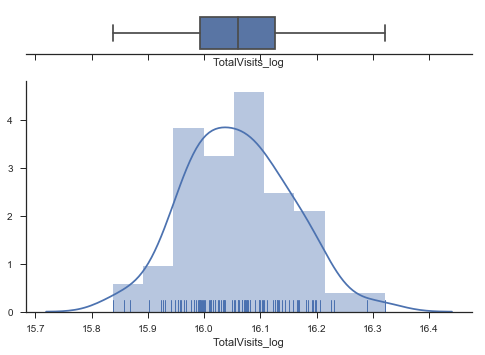

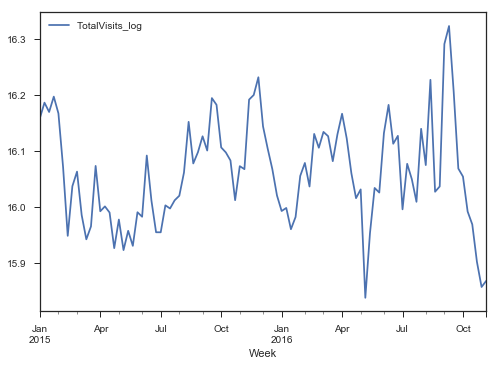

In [140]:
# 6. Outlier treatment (univariate/multivariate w/ deletion, transformation, imputation, or treat separately)
# Lets take care of TotalVisits now

c ='TotalVisits_log'    # Variable to analyze
df = visits_df    # From this dataframe

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [141]:
# Calculate the min and max cuttoffs for detecting the outliers 
q75, q25 = np.percentile(df[c].dropna(), [75, 25])
iqr = q75 - q25
min = q25 - (iqr*1.5)    # Lower fence
max = q75 + (iqr*1.5)    # Upper fence

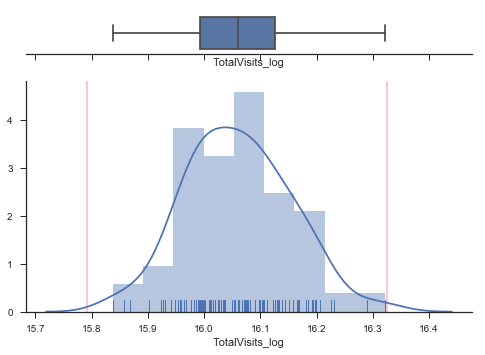

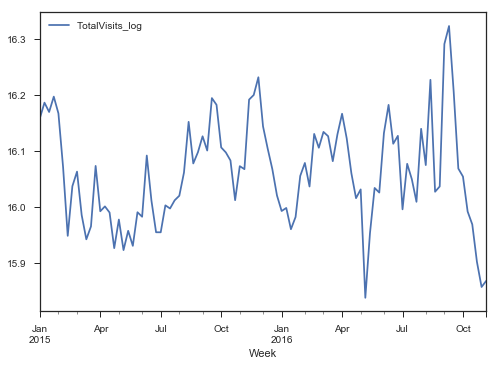

In [142]:
# Graph the outlier cutoffs

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.axvline(x=min, color='pink')    # Visualize the outlier cutoffs
plt.axvline(x=max, color='pink')    # Visualize the outlier cutoffs
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [143]:
# Identify the outliers by creating a column and flagging those data points that are < min and > max 
df['Outlier'] = 0
df.loc[df[c] < min, 'Outlier'] = 1
df.loc[df[c] > max, 'Outlier'] = 1

In [144]:
# Create a mask of `Outlier` == 0 to get rid of Outliers
df = df[(df['Outlier'] == 0)]

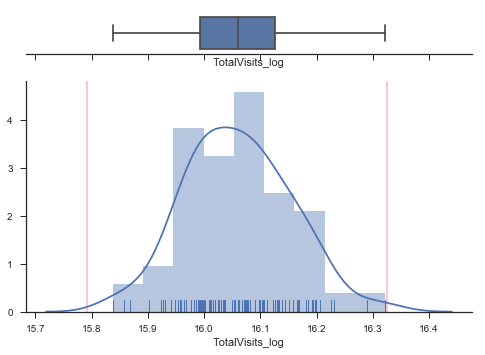

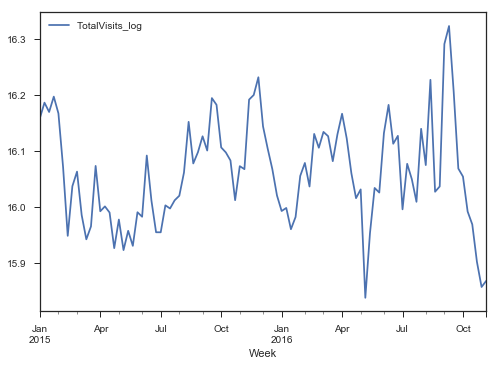

In [145]:
# Re-plot the data with the outliers removed

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.axvline(x=min, color='pink')    # Visualize the outlier cutoffs
plt.axvline(x=max, color='pink')    # Visualize the outlier cutoffs
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [146]:
# Update visits_df with df
visits_df.update(df)
visits_df = visits_df.drop('Outlier', axis=1) # drop the outlier column

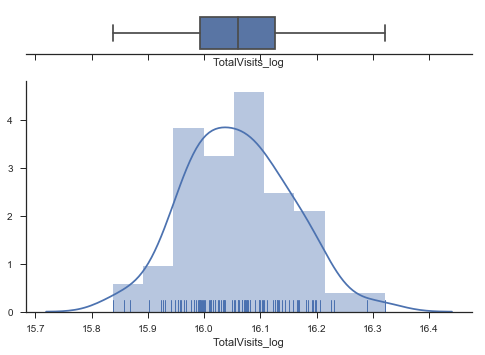

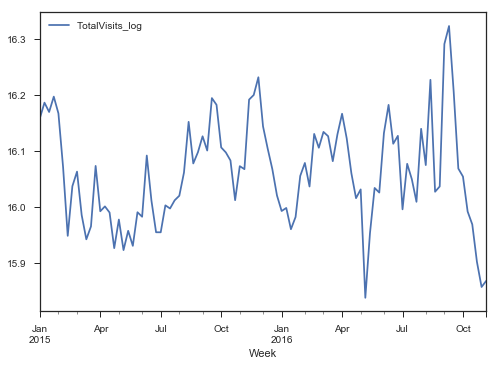

In [147]:
# Plot the orders_df df to confirm the outliers are gone and df updated
c ='TotalVisits_log'    # Variable to analyze
df = visits_df    # From this dataframe

# Seaborn graphs below
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[c].dropna(), ax=ax_box) # box
sns.distplot(df[c].dropna(), ax=ax_hist, kde=True, rug=True) #distr
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
df.set_index('Week').plot(y=c); # trend

In [149]:
orders_df.head()

,Week,WebOrderSubmissions,WebOrderSubmissions_log
0,2015-01-04,3279.000,8.095
1,2015-01-11,3156.000,8.057
2,2015-01-18,2900.000,7.972
3,2015-01-25,3091.000,8.036
4,2015-02-01,3721.000,8.222


In [150]:
# # Python - Prophet has no problem with missing data. If you set their values to NA in the history but leave the dates in future, then Prophet will give you a prediction for their values.
# df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None

In [151]:
# 7. Variable creation for WebOrderSubmissions

# Rename  orders_df the columns to 'ds' and 'y' in order to comply with prophet API
orders_df.columns = ['ds','raw', 'y']
orders_df.head()

,ds,raw,y
0,2015-01-04,3279.000,8.095
1,2015-01-11,3156.000,8.057
2,2015-01-18,2900.000,7.972
3,2015-01-25,3091.000,8.036
4,2015-02-01,3721.000,8.222


In [152]:
# 7. Variable creation for TotalVisits

# Rename  visits_df the columns to 'ds' and 'y' in order to comply with prophet API
visits_df.columns = ['ds','raw', 'y']
visits_df.head()

,ds,raw,y
0,2015-01-04,10403800.000,16.158
1,2015-01-11,10699393.000,16.186
2,2015-01-18,10522657.000,16.169
3,2015-01-25,10815097.000,16.196
4,2015-02-01,10496132.000,16.167


#### Model ####

In [153]:
# Use fbprophet to forecast WebOrderSubmissions and TotalVisits
import pystan
from fbprophet import Prophet

In [154]:
# Create the first model (m1) for WebOrderSubmissions and fit the data to our dataframe
m1 = Prophet(weekly_seasonality=False)
m1.fit(orders_df)

In [155]:
# Use make_future_dataframe to predict WebOrderSubmissions in the future for 2017 
future1 = m1.make_future_dataframe(periods=60, freq='W-SUN')

In [156]:
# Then make the forecast for WebOrderSubmissions
forecast1 = m1.predict(future1)

In [157]:
# To see the last 5 predicted values:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2017-12-03,8.935,8.665,9.220
153,2017-12-10,8.888,8.610,9.171
154,2017-12-17,8.714,8.419,8.994
155,2017-12-24,8.485,8.229,8.751
156,2017-12-31,8.294,8.008,8.572


In [158]:
# To convert back to the numerical values representing sessions, use np.exp
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
152,7596.849,5794.993,10092.663
153,7241.833,5487.116,9615.707
154,6084.601,4532.747,8053.180
155,4843.948,3746.802,6316.389
156,4001.081,3005.472,5282.450


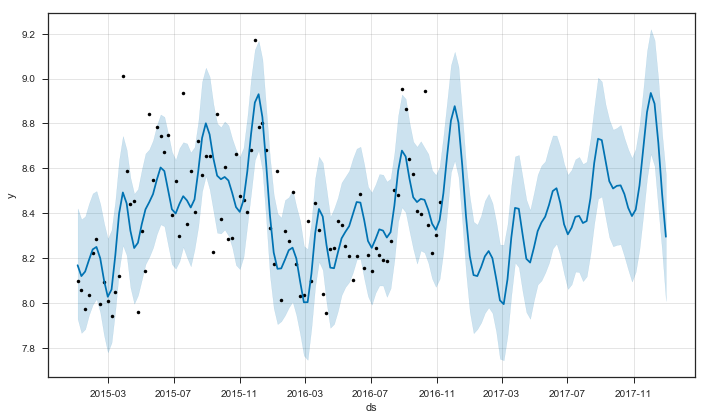

In [159]:
# Plot the forecast
m1.plot(forecast1);

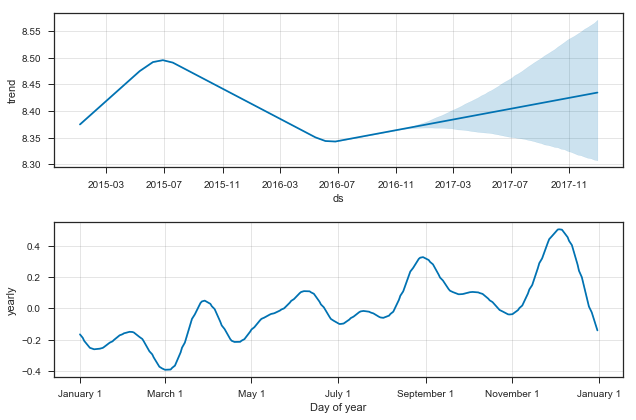

In [160]:
# Trend and yearly components of m1
m1.plot_components(forecast1);

In [161]:
# Let's try to model holidays. Read in the excel file with the holidays listed
hhelper = pd.read_excel('holidays_helper.xlsx', sheetname=0, index_col=None)
hhelper.head()

,year,wk,name,date,sunday
0,2015,1,NYE,2015-01-01,2014-12-28
1,2015,4,MLK,2015-01-19,2015-01-18
2,2015,8,Washington,2015-02-16,2015-02-15
3,2015,14,Good Friday,2015-04-03,2015-03-29
4,2015,22,Memorial,2015-05-25,2015-05-24


In [162]:
# let's confirm that the 'sunday' column which represents the sunday of that week is in datetime
hhelper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
year      42 non-null int64
wk        42 non-null int64
name      42 non-null object
date      42 non-null datetime64[ns]
sunday    42 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 1.7+ KB


In [163]:
# Account for holidays in the model. To capture the holidays, define a holiday dataframe with a datestamp and the description of the holiday:
holiday_df = pd.DataFrame({
  'holiday': 'fed_holiday',
  'ds': hhelper['sunday'],
  'lower_window': 0,
  'upper_window': 1
})
holiday_df.head()

,ds,holiday,lower_window,upper_window
0,2014-12-28,fed_holiday,0,1
1,2015-01-18,fed_holiday,0,1
2,2015-02-15,fed_holiday,0,1
3,2015-03-29,fed_holiday,0,1
4,2015-05-24,fed_holiday,0,1


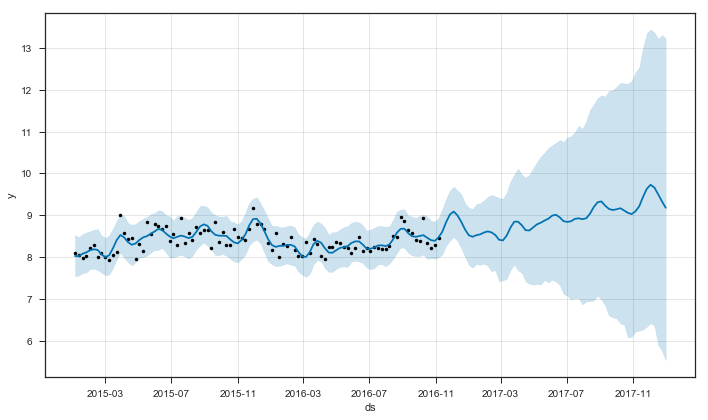

In [164]:
# To use the holidays in the model, pass it to the model via the 'holidays' keyword
m2 = Prophet(growth='linear',
             changepoint_prior_scale=0.09,
             #n_changepoints=7,
             #changepoints= #List,
             #yearly_seasonality=boolean
             weekly_seasonality=False,
             mcmc_samples=500,
             holidays=holiday_df,
             holidays_prior_scale=4,
             seasonality_prior_scale=5,
             uncertainty_samples=500,
             interval_width=0.95,
            ).fit(orders_df)
future2 = m2.make_future_dataframe(periods=60, freq='W-SUN')
forecast2 = m2.predict(future2)
m2.plot(forecast2); # New WebOrderSubmissions forecast based on model that includes holidays

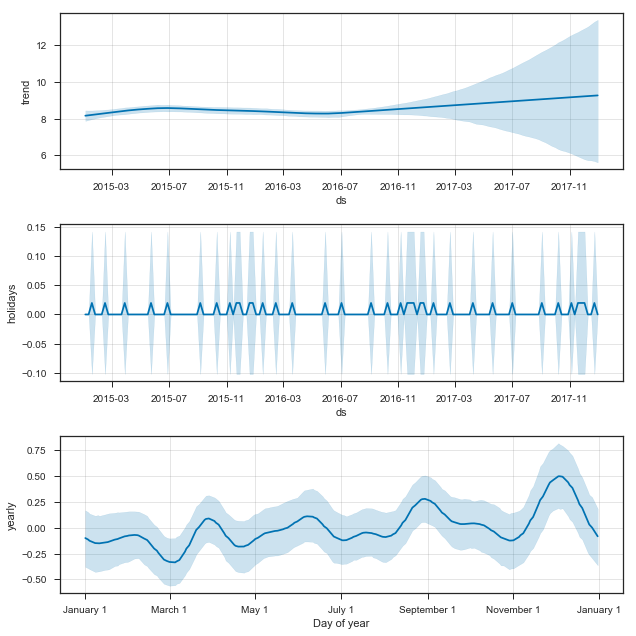

In [165]:
# Various components of m2 (w/ holidays added)
m2.plot_components(forecast2);

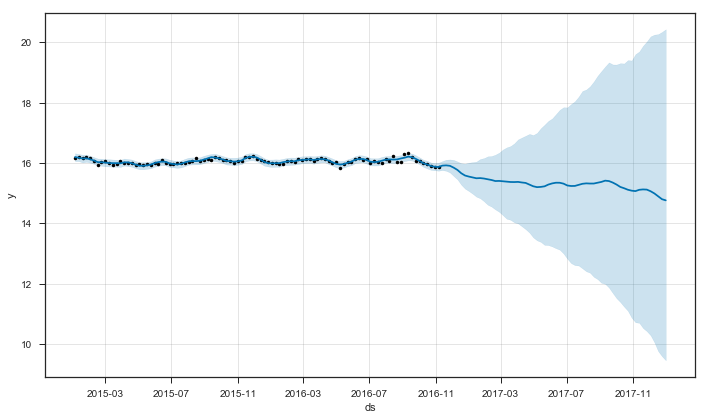

In [166]:
# Now lets model TotalVisits in the visits_df
m3 = Prophet(growth='linear',
             changepoint_prior_scale=0.09,
             #n_changepoints=7,
             #changepoints= #List,
             #yearly_seasonality=boolean
             weekly_seasonality=False,
             mcmc_samples=500,
             holidays=holiday_df,
             holidays_prior_scale=4,
             seasonality_prior_scale=5,
             uncertainty_samples=500,
             interval_width=0.95,
            ).fit(visits_df)
future3 = m3.make_future_dataframe(periods=60, freq='W-SUN')
forecast3 = m3.predict(future3)
m3.plot(forecast3); # New TotalVisits forecast based on model that includes holidays

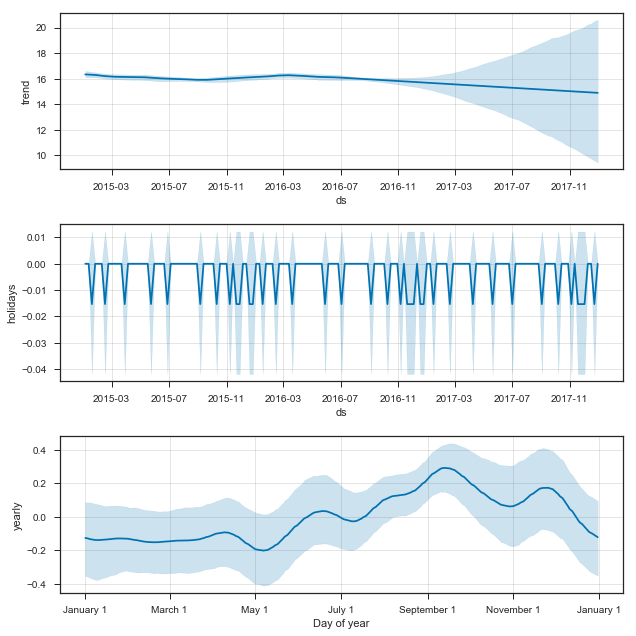

In [167]:
# Various components of m2 (w/ holidays added)
m3.plot_components(forecast3);

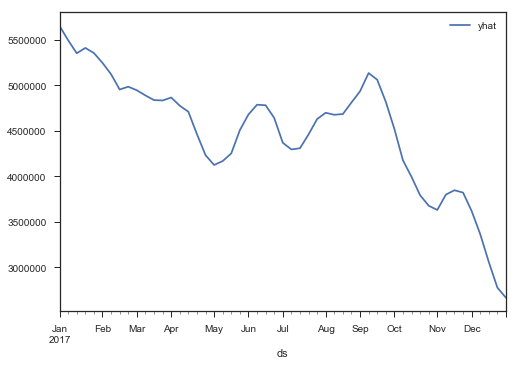

In [74]:
# Review the predictions of the future
import datetime
fig1 = forecast3[forecast3.ds > datetime.date(2016, 12, 31)]
fig1.plot(x='ds', y='yhat');

In [76]:
# Test the accuracy of the results from the 2 forecasted time-series
# Adj. R Square & Cross-validation is the best way to evaluate models used for prediction. 
# Here you divide your data set into two group (train and validate). 
# A simple mean squared difference between the observed and predicted values give you a measure for the prediction accuracy.

![Adj. R Square](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/Adjusted-R-Squre.png)

In [169]:
visits_df

,ds,raw,y
0,2015-01-04,10403800.000,16.158
1,2015-01-11,10699393.000,16.186
2,2015-01-18,10522657.000,16.169
3,2015-01-25,10815097.000,16.196
4,2015-02-01,10496132.000,16.167
...,...,...,...
92,2016-10-09,8810887.000,15.991
93,2016-10-16,8610234.000,15.968
94,2016-10-23,8054610.000,15.902
95,2016-10-30,7700316.000,15.857


In [170]:
forecast3

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,fed_holiday,fed_holiday_lower,fed_holiday_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2015-01-04,0.000,16.328,-0.364,0.087,16.101,16.597,16.062,16.323,0.000,0.000,0.000,-0.133,-0.364,0.087,-0.133,16.195
1,2015-01-11,0.010,16.314,-0.373,0.073,16.107,16.558,16.063,16.296,0.000,0.000,0.000,-0.139,-0.373,0.073,-0.139,16.175
2,2015-01-18,0.021,16.300,-0.370,0.057,16.097,16.517,16.018,16.275,-0.015,-0.042,0.012,-0.134,-0.353,0.065,-0.150,16.150
3,2015-01-25,0.031,16.285,-0.332,0.066,16.093,16.488,16.040,16.275,0.000,0.000,0.000,-0.129,-0.332,0.066,-0.129,16.156
4,2015-02-01,0.042,16.255,-0.326,0.055,16.072,16.445,16.014,16.240,0.000,0.000,0.000,-0.132,-0.326,0.055,-0.132,16.123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2017-12-03,1.583,14.946,-0.126,0.351,10.047,20.078,10.291,20.194,-0.015,-0.042,0.012,0.135,-0.116,0.361,0.119,15.065
153,2017-12-10,1.594,14.930,-0.179,0.281,9.897,20.234,10.060,20.252,0.000,0.000,0.000,0.062,-0.179,0.281,0.062,14.992
154,2017-12-17,1.604,14.915,-0.256,0.197,9.738,20.317,9.767,20.268,0.000,0.000,0.000,-0.019,-0.256,0.197,-0.019,14.897
155,2017-12-24,1.615,14.900,-0.334,0.117,9.595,20.493,9.600,20.342,-0.015,-0.042,0.012,-0.083,-0.315,0.129,-0.098,14.802


In [175]:
eval_m3 = forecast3[['ds','yhat']].copy()
eval_m3 = pd.merge(eval_m3, visits_df, on='ds')
eval_m3 = eval_m3.drop('raw', axis=1)
eval_m3 = {
    
}
#eval_m3[['yhat']] = eval_m3(eval_m3[['yhat']]) # To convert back to the numerical values use np.exp
eval_m3.head()

Mean Absolute Percentage Error
root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data.

,ds,yhat,y
0,2015-01-04,16.195,16.158
1,2015-01-11,16.175,16.186
2,2015-01-18,16.150,16.169
3,2015-01-25,16.156,16.196
4,2015-02-01,16.123,16.167


#### Interpret ####